<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

### Use yasa detection

In [1]:
import misleep 
import yasa

e:\workplace\scripts\signal_process


In [55]:
data = misleep.load_mat(data_path=r'E:\workplace\EEGProcessing\00_DATA\20240128_0700_24h_mouse5_6pin_M_P37\mouse5_new.mat')

In [56]:
data.sf

[305.0, 305.0, 305.0, 305.0, 305.0, 305.0, 305.0]

In [68]:
art, zscores = yasa.art_detect(data.signals[0], data.sf[0], window=5, method='std', threshold=1)

In [63]:
len(art)

17280

In [62]:
art[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [38]:
a = art[:10]
a = [[each]*5 for each in a]

In [44]:
data = data.signals[0]

In [46]:
data.shape[0]/305.0

86400.0

In [69]:
import numpy as np
art = np.repeat(art, int(5*305))

In [71]:
data.signals[0].shape

(26352000,)

In [82]:
art.shape[0]

26352000

In [81]:
a = np.array([1,1,1,1,1,1,1])
b = np.array([1,1,1,1,0,0,0])
b = b.astype(bool)

print(a, b)
a = a[b]
print(a)

[1 1 1 1 1 1 1] [ True  True  True  True False False False]
[1 1 1 1]


In [78]:
np.nan

nan

In [22]:
print(f'{art.sum()} / {art.size} epochs rejected')

257 / 17280 epochs rejected


In [23]:
anno = misleep.load_misleep_anno(r'E:\workplace\EEGProcessing\00_DATA\20240128_0700_24h_mouse5_6pin_M_P37\mouse5_new.txt')

In [24]:
art_num = [[1]*5 if each else [0]*5 for each in art]
art_num = [each for item in art_num for each in item]

In [25]:
sum(art_num)

1285

In [26]:
len(art_num)

86400

In [27]:
sleep_state = [each if art_num[idx] == 0 else 4 for idx, each in enumerate(anno.sleep_state[:86400])]

(<Figure size 2000x300 with 1 Axes>, <Axes: >)

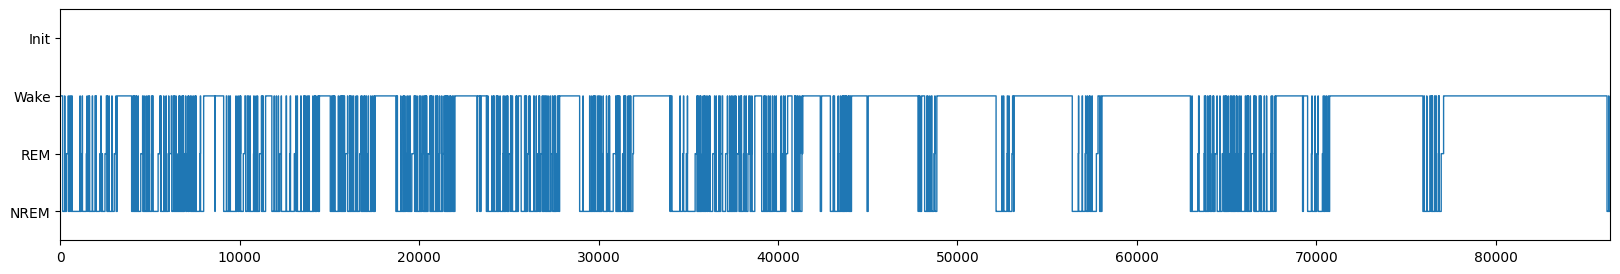

In [28]:
misleep.plot_hypno(anno.sleep_state)

(<Figure size 2000x300 with 1 Axes>, <Axes: >)

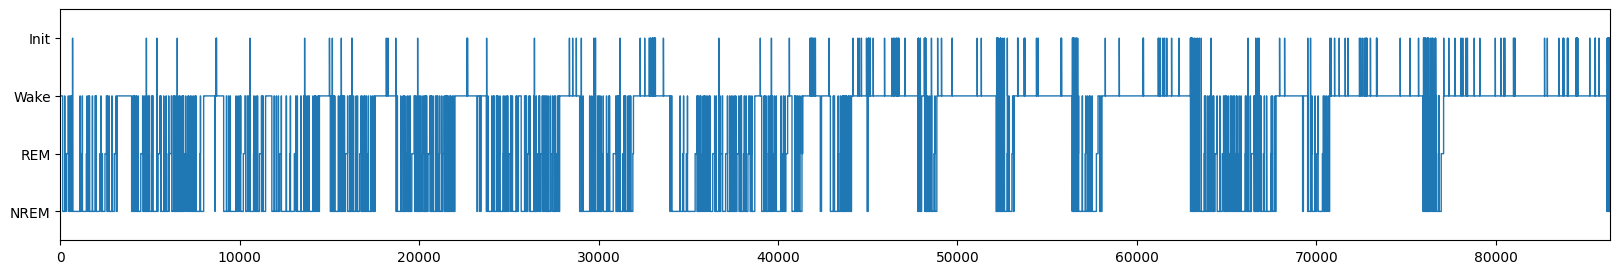

In [29]:
misleep.plot_hypno(sleep_state=sleep_state)

In [92]:
anno._sleep_state = sleep_state

In [93]:
save_thread = misleep.SaveThread(file=[anno, data], 
                                 file_path=r'E:\workplace\EEGProcessing\00_DATA\20240128_0700_24h_mouse5_6pin_M_P37\mouse5_new_art.txt')
saved = save_thread.save_anno()
save_thread.quit()

In [94]:
import numpy as np

In [100]:
a = open(r'F:/师姐2.Tif', 'r')

In [3]:
from PIL import Image
im = Image.open(r'F:/师姐2.Tif')
im.show()

: 

: 